In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from truss import Node, Bar, Truss

In [3]:
n0 = Node(0,0, freex=False,freey=False)
n1 = Node(1,0, freey=False)
n2 = Node(0,1)
n3 = Node(1,1)

n3.apply_load(10**3, 0)

In [4]:
b0 = Bar(n0,n1)
b1 = Bar(n0,n2)
b2 = Bar(n0,n3)
b3 = Bar(n1,n2)
b4 = Bar(n1,n3)
b5 = Bar(n2,n3)
bars = [b0, b1, b2, b3, b4, b5]

In [5]:
b0p = Bar(n1, n0)

In [6]:
b0p == b0

True

In [7]:
b0p is b0

False

In [8]:
set([b0p, b0])

{B(N(1.00, 0.00), N(0.00, 0.00))}

In [9]:
n1.y = 0.5

In [10]:
with np.printoptions(precision=3, suppress=True):
    truss = Truss(bars)
    truss.solve(method="solve")
    print(truss.u)
    print(truss.stiffness)
    print(truss.F)
    

[ 0.001  0.     0.     0.001 -0.   ]
[[ 3867259.996  -806504.998 -1613009.996 -2254250.           0.   ]
 [ -806504.998  2657502.499   806504.998        0.           0.   ]
 [-1613009.996   806504.998  3226019.992       -0.          -0.   ]
 [-2254250.           0.          -0.     3051247.731   796997.731]
 [       0.           0.          -0.      796997.731  5305497.731]]
[   0.    0.    0. 1000.    0.]


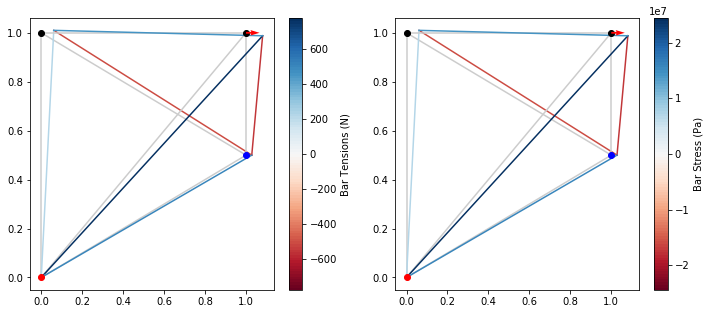

In [11]:
truss.plot(def_scale=100)

In [12]:
df_n, df_b = truss.details()

In [13]:
df_n

,ID,x (m),y (m),Free x?,Free y?,Force x (N),Force y (N),Delta x (mm),Delta y (mm)
0,0,0,1.0,True,True,0,0,0.609764,0.100123
1,1,1,0.5,True,False,0,0,0.279851,0.000000
2,2,0,0.0,False,False,0,0,0.000000,0.000000
3,3,1,1.0,True,True,1000,0,0.810010,-0.121681


In [14]:
df_b

,ID,Node 0,Node 1,E (GPa),Yield (MPa),w (mm),t (mm),A (mm2),I (mm4),L (m),m (kg),Buckling Load (N),T (N),ext (mm),Stress (MPa),Strain,Will buckle?,Will yield?
0,0,"N(1.00, 0.50)","N(0.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,1.118034,0.095843,37.080926,-504.684146,-0.250307,-15.895564,-0.000224,True,False
1,1,"N(0.00, 0.00)","N(0.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,1.000000,0.085725,46.351158,225.701611,0.100123,7.108712,0.000100,False,False
2,2,"N(1.00, 0.50)","N(1.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,0.500000,0.042862,185.404631,-548.596777,-0.121681,-17.278639,-0.000243,True,False
3,3,"N(0.00, 0.00)","N(1.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,1.414214,0.121233,23.175579,775.833002,0.486722,24.435685,0.000344,False,False
4,4,"N(0.00, 0.00)","N(1.00, 0.50)",71.0,300.0,5.0,6.35,31.75,66.145833,1.118034,0.095843,37.080926,504.684146,0.250307,15.895564,0.000224,False,False
5,5,"N(0.00, 1.00)","N(1.00, 1.00)",71.0,300.0,5.0,6.35,31.75,66.145833,1.000000,0.085725,46.351158,451.403223,0.200245,14.217424,0.000200,False,False


In [15]:
truss.mass()

0.527232885005603

In [16]:
n00 = Node(0,0.5,freex=False, freey=False)
n01 = Node(1,0.5, freey=False)
n11 = Node(0.5,0.5)
n11.apply_load(0, -10**2)
 
nodes = [Node(np.random.rand(),np.random.rand()) for n in range(10)]
nodes = [n00, n01, n11] + nodes

In [17]:
randTruss = Truss.from_delaunay(nodes)

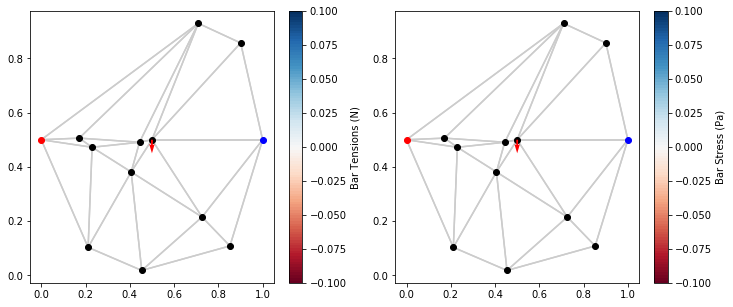

In [18]:
randTruss.plot()

In [19]:
randTruss.solve()

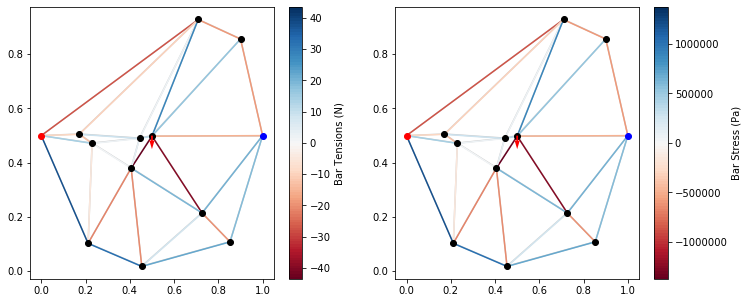

In [20]:
randTruss.plot(def_scale=100)

In [21]:
df_n, df_b = randTruss.details()
df_b

,ID,Node 0,Node 1,E (GPa),Yield (MPa),w (mm),t (mm),A (mm2),I (mm4),L (m),m (kg),Buckling Load (N),T (N),ext (mm),Stress (MPa),Strain,Will buckle?,Will yield?
0,0,"N(0.21, 0.10)","N(0.45, 0.02)",71.0,300.0,5.0,6.35,31.75,66.145833,0.256816,0.022016,702.777468,32.542397,0.003707,1.024957,1.443602e-05,False,False
1,1,"N(0.44, 0.49)","N(0.71, 0.93)",71.0,300.0,5.0,6.35,31.75,66.145833,0.512236,0.043911,176.653087,2.081023,0.000473,0.065544,9.231555e-07,False,False
2,2,"N(0.21, 0.10)","N(0.23, 0.47)",71.0,300.0,5.0,6.35,31.75,66.145833,0.369245,0.031653,339.963581,-5.117300,-0.000838,-0.161175,-2.270068e-06,False,False
3,3,"N(0.23, 0.47)","N(0.44, 0.49)",71.0,300.0,5.0,6.35,31.75,66.145833,0.214933,0.018425,1003.352110,1.982360,0.000189,0.062437,8.793879e-07,False,False
4,4,"N(0.45, 0.02)","N(0.41, 0.38)",71.0,300.0,5.0,6.35,31.75,66.145833,0.366034,0.031378,345.954413,-20.659730,-0.003355,-0.650700,-9.164791e-06,False,False
5,5,"N(0.23, 0.47)","N(0.17, 0.51)",71.0,300.0,5.0,6.35,31.75,66.145833,0.067230,0.005763,10255.059271,-12.532667,-0.000374,-0.394730,-5.559573e-06,False,False
6,6,"N(0.00, 0.50)","N(0.71, 0.93)",71.0,300.0,5.0,6.35,31.75,66.145833,0.828958,0.071062,67.452147,-27.522167,-0.010121,-0.866840,-1.220901e-05,False,False
7,7,"N(0.00, 0.50)","N(0.17, 0.51)",71.0,300.0,5.0,6.35,31.75,66.145833,0.171609,0.014711,1573.911825,-8.998254,-0.000685,-0.283410,-3.991684e-06,False,False
8,8,"N(0.00, 0.50)","N(0.23, 0.47)",71.0,300.0,5.0,6.35,31.75,66.145833,0.231377,0.019835,865.806188,14.670847,0.001506,0.462074,6.508083e-06,False,False
9,9,"N(0.00, 0.50)","N(0.21, 0.10)",71.0,300.0,5.0,6.35,31.75,66.145833,0.449456,0.038530,229.448711,38.193011,0.007615,1.202929,1.694267e-05,False,False


In [22]:
randTruss.mass()

0.8419821725518096

# Vertify against existing solution

using Q1 from http://www.stad4students.co.uk/_pages/pg_STADs_tPJFS.php

<img src="pinJoint_verify.png">

Solution:

FAB = -268.9e3

FAD = + 49.9e3

FBD = +192.1e3

FBC = - 85.6e3

FCD = -188.7e3

In [23]:
x1=7.34
y1=38.91
P1=75.5e3
P2=85.4e3

nA = Node(0,0,freey=False)
nB = Node(x1,y1)
nC = Node(x1+x1,y1,freex=False,freey=False)
nD = Node(x1+x1,0)

nD.apply_load(P2,0)
nB.apply_load(0,-P1)

In [24]:
bAD = Bar(nA, nD)
bAB = Bar(nA, nB)
bBD = Bar(nB, nD)
bBC = Bar(nB, nC)
bCD = Bar(nC, nD)
bars = [bAD, bAB, bBD, bBC, bCD]

In [25]:
exampleTruss = Truss(bars)

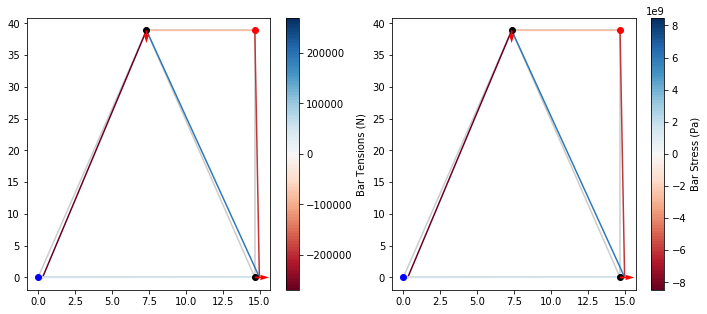

In [26]:
exampleTruss.solve()
exampleTruss.plot(def_scale=1e-2)

In [27]:
df_n, df_b = exampleTruss.details()

In [28]:
df_n

,ID,x (m),y (m),Free x?,Free y?,Force x (N),Force y (N),Delta x (mm),Delta y (mm)
0,0,7.34,38.91,True,True,0.0,-75500.0,278.068537,910.460995
1,1,0.00,0.00,True,False,0.0,0.0,30571.765399,0.000000
2,2,14.68,0.00,True,True,85400.0,0.0,30896.208064,3255.486504
3,3,14.68,38.91,False,False,0.0,0.0,0.000000,0.000000


In [29]:
df_b

,ID,Node 0,Node 1,E (GPa),Yield (MPa),w (mm),t (mm),A (mm2),I (mm4),L (m),m (kg),Buckling Load (N),T (N),ext (mm),Stress (MPa),Strain,Will buckle?,Will yield?
0,0,"N(14.68, 38.91)","N(14.68, 0.00)",71.0,300.0,5.0,6.35,31.75,66.145833,38.910000,3.335560,0.030615,-188606.539510,-3255.486504,-5940.363449,-0.083667,True,False
1,1,"N(0.00, 0.00)","N(7.34, 38.91)",71.0,300.0,5.0,6.35,31.75,66.145833,39.596259,3.394389,0.029563,-268764.606853,-4720.892932,-8465.026987,-0.119226,True,False
2,2,"N(0.00, 0.00)","N(14.68, 0.00)",71.0,300.0,5.0,6.35,31.75,66.145833,14.680000,1.258443,0.215084,49821.177075,324.442666,1569.170932,0.022101,False,True
3,3,"N(7.34, 38.91)","N(14.68, 38.91)",71.0,300.0,5.0,6.35,31.75,66.145833,7.340000,0.629221,0.860337,-85400.000000,-278.068537,-2689.763780,-0.037884,True,False
4,4,"N(7.34, 38.91)","N(14.68, 0.00)",71.0,300.0,5.0,6.35,31.75,66.145833,39.596259,3.394389,0.029563,191933.007548,3371.333709,6045.134096,0.085143,False,True


In [30]:
bAD.tension()

49821.177075302316

In [31]:

print(f"AB: True = -268.9e3, Solve = {bAB.tension()}")
print(f"AD: True = + 49.9e3, Solve = {bAD.tension()}")
print(f"BD: True = +192.1e3, Solve = {bBD.tension()}")
print(f"BC: True = - 85.6e3, Solve = {bBC.tension()}")
print(f"CD: True = -188.7e3, Solve = {bCD.tension()}")

AB: True = -268.9e3, Solve = -268764.60685304634
AD: True = + 49.9e3, Solve = 49821.177075302316
BD: True = +192.1e3, Solve = 191933.0075481299
BC: True = - 85.6e3, Solve = -85400.000000001
CD: True = -188.7e3, Solve = -188606.53950953943


VERIFIED! The small differences are likely to be due to rounding errors in the 'true' solution

# Lets check the deflections

using: https://civilengineer.webinfolist.com/str/prob75.htm

<img src="pinJoin_verify_2.png">

Solution: E moves by 2.6 mm downwards

In [32]:
l = 2
nA = Node(0,0, freey=False)
nB = Node(l, 0)
nC = Node(2*l,0, freex=False, freey=False)
nD = Node(2*l, l)
nE = Node(l, l)
nF = Node(0, l)

nB.apply_load(0, -20e3)
nD.apply_load(-15e3, 0)
nE.apply_load(0, -10e3)
nF.apply_load(0, -25e3)

In [33]:
#each of the bars have an area of 250 mm^2 , and E = 200 GPa
# so w = t = np.sqrt(250)*1e-3
w0 = np.sqrt(250)*1e-3
E = 200e9;
bAB = Bar(nA, nB, w=w0, t=w0, E=E)
bBC = Bar(nB, nC, w=w0, t=w0, E=E)
bCD = Bar(nC, nD, w=w0, t=w0, E=E)
bDE = Bar(nD, nE, w=w0, t=w0, E=E)
bEF = Bar(nE, nF, w=w0, t=w0, E=E)
bAF = Bar(nA, nF, w=w0, t=w0, E=E)
bAE = Bar(nA, nE, w=w0, t=w0, E=E)
bBE = Bar(nB, nE, w=w0, t=w0, E=E)
bCE = Bar(nC, nE, w=w0, t=w0, E=E)
bars = [bAB, bBC, bCD, bDE, bEF, bAF, bAE, bBE, bCE]

In [34]:
w0

0.015811388300841896

In [35]:
example2Truss = Truss(bars)

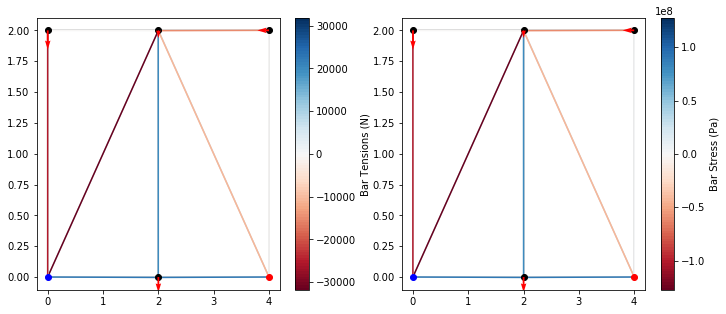

In [36]:
example2Truss.solve()
example2Truss.plot()

In [37]:
example2Truss.details()

(   ID  x (m)  y (m)  Free x?  Free y?  Force x (N)  Force y (N)  Delta x (mm)  \
 0   0      0      0     True    False          0.0          0.0     -1.800000   
 1   1      2      0     True     True          0.0     -20000.0     -0.900000   
 2   2      2      2     True     True          0.0     -10000.0     -1.748528   
 3   3      4      2     True     True     -15000.0          0.0     -2.348528   
 4   4      0      2     True     True          0.0     -25000.0     -1.748528   
 5   5      4      0    False    False          0.0          0.0      0.000000   
 
    Delta y (mm)  
 0  0.000000e+00  
 1 -3.397056e+00  
 2 -2.597056e+00  
 3  7.032707e-17  
 4 -1.000000e+00  
 5  0.000000e+00  ,
    ID         Node 0         Node 1  E (GPa)  Yield (MPa)     w (mm)  \
 0   0  N(4.00, 0.00)  N(2.00, 2.00)    200.0        300.0  15.811388   
 1   1  N(0.00, 0.00)  N(2.00, 2.00)    200.0        300.0  15.811388   
 2   2  N(2.00, 0.00)  N(4.00, 0.00)    200.0        300.0  15.811388  

In [38]:
print(f'Node E deflection: True: 2.6 mm downwards, Solve: {nE.dy}')

Node E deflection: True: 2.6 mm downwards, Solve: -0.0025970562748477144


Verified!

In [39]:
example2Truss.set_all_widths(0.6)
example2Truss.solve()

In [40]:
example2Truss.mass()

503.49949160508066

In [41]:
example2Truss.details()

(   ID  x (m)  y (m)  Free x?  Free y?  Force x (N)  Force y (N)  Delta x (mm)  \
 0   0      0      0     True    False          0.0          0.0     -0.047434   
 1   1      2      0     True     True          0.0     -20000.0     -0.023717   
 2   2      2      2     True     True          0.0     -10000.0     -0.046078   
 3   3      4      2     True     True     -15000.0          0.0     -0.061889   
 4   4      0      2     True     True          0.0     -25000.0     -0.046078   
 5   5      4      0    False    False          0.0          0.0      0.000000   
 
    Delta y (mm)  
 0  0.000000e+00  
 1 -8.952029e-02  
 2 -6.843844e-02  
 3  1.853281e-18  
 4 -2.635231e-02  
 5  0.000000e+00  ,
    ID         Node 0         Node 1  E (GPa)  Yield (MPa)  w (mm)     t (mm)  \
 0   0  N(4.00, 0.00)  N(2.00, 2.00)    200.0        300.0   600.0  15.811388   
 1   1  N(0.00, 0.00)  N(2.00, 2.00)    200.0        300.0   600.0  15.811388   
 2   2  N(2.00, 0.00)  N(4.00, 0.00)    200.0  

In [42]:
sol=example2Truss.miminize_mass(buckling_SF=1.1, yield_SF=1.1, keep_feasible=True)

/Users/Devansh/anaconda3/lib/python3.6/site-packages/scipy/optimize/_constraints.py:331: OptimizeWarning: Constraint options `finite_diff_jac_sparsity`, `finite_diff_rel_step`, `keep_feasible`, and `hess`are ignored by this method.
  "are ignored by this method.", OptimizeWarning)


In [43]:
sol

     fun: 93.74790435994097
     jac: array([120.74767113, 120.74767017,  85.38149643,  85.38149643,
        85.38149738,  85.38149643,  85.38149643,  85.38149738,
        85.38149643])
 message: 'Optimization terminated successfully.'
    nfev: 159
     nit: 15
    njev: 14
  status: 0
 success: True
       x: array([1.43549086e-01, 4.30647254e-01, 5.21775946e-03, 1.00001324e-04,
       1.00001325e-04, 5.21775946e-03, 4.63800856e-03, 1.69174219e-01,
       1.01504532e-01])

In [44]:
example2Truss.set_widths(sol.x)
example2Truss.solve()

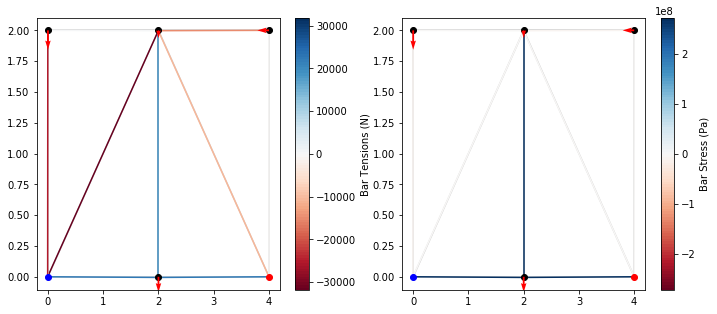

In [45]:
example2Truss.plot()

In [46]:
example2Truss.mass()

93.74790435994097

In [47]:
example2Truss.details()

(   ID  x (m)  y (m)  Free x?  Free y?  Force x (N)  Force y (N)  Delta x (mm)  \
 0   0      0      0     True    False          0.0          0.0     -5.454544   
 1   1      2      0     True     True          0.0     -20000.0     -2.727272   
 2   2      2      2     True     True          0.0     -10000.0     -2.727272   
 3   3      4      2     True     True     -15000.0          0.0     -2.820734   
 4   4      0      2     True     True          0.0     -25000.0     -2.727272   
 5   5      4      0    False    False          0.0          0.0      0.000000   
 
    Delta y (mm)  
 0  0.000000e+00  
 1 -5.548006e+00  
 2 -2.820734e+00  
 3 -1.144515e-14  
 4 -9.346216e-02  
 5  0.000000e+00  ,
    ID         Node 0         Node 1  E (GPa)  Yield (MPa)      w (mm)  \
 0   0  N(4.00, 0.00)  N(2.00, 2.00)    200.0        300.0  143.549086   
 1   1  N(0.00, 0.00)  N(2.00, 2.00)    200.0        300.0  430.647254   
 2   2  N(2.00, 0.00)  N(4.00, 0.00)    200.0        300.0    5.2177